Install FER package first!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Mandatory to install FER module

!pip install fer

     |████████████████████████████████| 810 kB 4.2 MB/s 
     |████████████████████████████████| 2.3 MB 40.2 MB/s 


In [3]:
from fer import Video
from fer import FER
import matplotlib.pyplot as plt 
%matplotlib inline

# By default FER will use OpenCV's Haar Cascades which is faster but lesser capability in detecting a face
# Multi-task Cascaded Convolutional Networks (MTCNN) is also an option. It is slower but is able to detect the presence of a face better
# The difference is showcased further down below
face_detector = FER(mtcnn=True)

Clear face images

img1 through img4 is taken from the website (thispersondoesnotexist.com), img5 is real (or so I think it is)

[{'box': (63, 119, 850, 850), 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.94, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.06}}]
Happy 94%


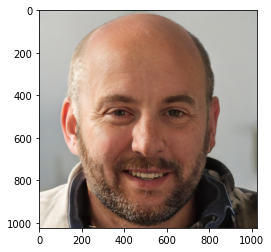

In [4]:
img1 = plt.imread("/content/drive/MyDrive/Colab Notebooks/Input/img1.jpg")
plt.imshow(img1)

# Capture all the emotions on the image
captured_emotions = face_detector.detect_emotions(img1)

# Print all captured emotions with the image
print(captured_emotions)

# Use the top Emotion() function to call for the dominant emotion in the image
dominant_emotion, emotion_score = face_detector.top_emotion(img1)

# Formatting the output
emotion_score = "{:.0%}".format(emotion_score)
print(dominant_emotion.capitalize(), emotion_score)

[{'box': (127, 200, 717, 717), 'emotions': {'angry': 0.05, 'disgust': 0.0, 'fear': 0.03, 'happy': 0.01, 'sad': 0.1, 'surprise': 0.0, 'neutral': 0.81}}]
Neutral 81%


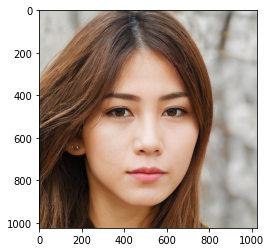

In [ ]:
img2 = plt.imread("/content/drive/MyDrive/Colab Notebooks/FER_Final/Input/img2.jpg")
plt.imshow(img2)

captured_emotions = face_detector.detect_emotions(img2)

print(captured_emotions)

dominant_emotion, emotion_score = face_detector.top_emotion(img2)

emotion_score = "{:.0%}".format(emotion_score)
print(dominant_emotion.capitalize(), emotion_score)

[{'box': (140, 219, 694, 694), 'emotions': {'angry': 0.06, 'disgust': 0.0, 'fear': 0.03, 'happy': 0.0, 'sad': 0.22, 'surprise': 0.02, 'neutral': 0.67}}]
Neutral 67%


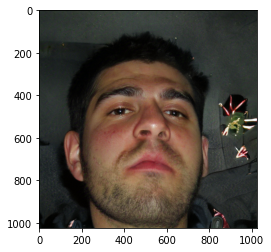

In [ ]:
img3 = plt.imread("/content/drive/MyDrive/Colab Notebooks/FER_Final/Input/img3.jpg")
plt.imshow(img3)

captured_emotions = face_detector.detect_emotions(img3)

print(captured_emotions)

dominant_emotion, emotion_score = face_detector.top_emotion(img3)

emotion_score = "{:.0%}".format(emotion_score)
print(dominant_emotion.capitalize(), emotion_score)

[{'box': (151, 199, 701, 701), 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 1.0, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.0}}]
Happy 100%


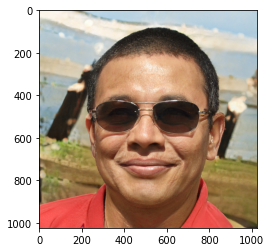

In [ ]:
img4 = plt.imread("/content/drive/MyDrive/Colab Notebooks/FER_Final/Input/img4.jpg")
plt.imshow(img4)

captured_emotions = face_detector.detect_emotions(img4)

print(captured_emotions)

dominant_emotion, emotion_score = face_detector.top_emotion(img4)

emotion_score = "{:.0%}".format(emotion_score)
print(dominant_emotion.capitalize(), emotion_score)

Playground

In [ ]:
face_detector = FER(mtcnn=True) # Uses MTCNN

In [ ]:
face_detector = FER(mtcnn=False) # Uses Haar Cascade

[{'box': (150, 75, 237, 237), 'emotions': {'angry': 0.78, 'disgust': 0.0, 'fear': 0.14, 'happy': 0.0, 'sad': 0.03, 'surprise': 0.01, 'neutral': 0.04}}]
angry 0.78


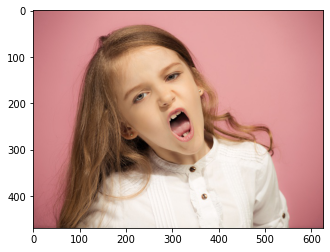

In [ ]:
# Try using MTCNN (mtcnn=True) or Haar Cascade (mtcnn=False) to run this block of code
# MTCNN can detect a face in this image and therefore can generate an emotion result
# Haar Cascade fails to detect a face due to the girl tilting her head

img5 = plt.imread("/content/drive/MyDrive/Colab Notebooks/FER_Final/Input/img5.jpg")
plt.imshow(img5)

captured_emotions = face_detector.detect_emotions(img5)

print(captured_emotions)

dominant_emotion, emotion_score = face_detector.top_emotion(img5)

print(dominant_emotion, emotion_score)

InvalidImage: ignored

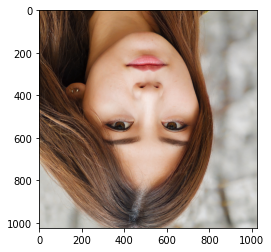

In [ ]:
# Flipping the image upside down
# Will produce an error or cannot be detected

from PIL import Image

# open the original image
original_img = Image.open("/content/drive/MyDrive/Colab Notebooks/FER_Final/Input/img2.jpg")

# Flip the original image vertically
vertical_img = original_img.transpose(method=Image.FLIP_TOP_BOTTOM)

plt.imshow(vertical_img)

captured_emotions = face_detector.detect_emotions(vertical_img)

print(captured_emotions)

dominant_emotion, emotion_score = face_detector.top_emotion(vertical_img)

print(dominant_emotion, emotion_score)

[]
None None


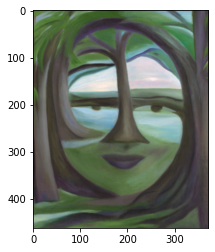

In [ ]:
# Abstract face art cannot be detected
# Uncomment the four lines to try it out
# MTCNN produces an error, Haar Cascade detects nothing

img6 = plt.imread("/content/drive/MyDrive/Colab Notebooks/FER_Final/Input/img6.jpg")
plt.imshow(img6)

captured_emotions = face_detector.detect_emotions(img6)

print(captured_emotions)

dominant_emotion, emotion_score = face_detector.top_emotion(img6)

print(dominant_emotion, emotion_score)

Video analyser FER

In [6]:
# Some things to note:
# MTCNN takes a very long time to process the video around 1-2 frame(s) per second
# Haar Cascade is faster with around 3+ frames per second 

# Path to the video file
vid1 = "/content/drive/MyDrive/Colab Notebooks/Input/vid1.mp4"

# Input the video for processing
input_video = Video(vid1)

# This will output a video file that was analyzed with FER
# A frame-by-frame zip file will be produced as well
# A .csv file will be produced should there be further need to analyze emotions present in the video
processing_data = input_video.analyze(face_detector, display=False)

18-11-2021:06:20:16,8 INFO     [classes.py:200] 60.00 fps, 1330 frames, 22.16 seconds
18-11-2021:06:20:16,11 INFO     [classes.py:207] Making directories at output


100%|█████████▉| 1329/1330 [43:04<00:01,  1.94s/frames]


18-11-2021:07:03:20,585 INFO     [classes.py:321] Completed analysis: saved to output/vid1_output.mp4
18-11-2021:07:03:20,586 INFO     [classes.py:327] Starting to Zip
18-11-2021:07:03:20,655 INFO     [classes.py:338] Compressing: 5%
18-11-2021:07:03:20,714 INFO     [classes.py:338] Compressing: 10%
18-11-2021:07:03:20,783 INFO     [classes.py:338] Compressing: 15%
18-11-2021:07:03:20,854 INFO     [classes.py:338] Compressing: 20%
18-11-2021:07:03:20,917 INFO     [classes.py:338] Compressing: 25%
18-11-2021:07:03:20,977 INFO     [classes.py:338] Compressing: 31%
18-11-2021:07:03:21,44 INFO     [classes.py:338] Compressing: 36%
18-11-2021:07:03:21,119 INFO     [classes.py:338] Compressing: 41%
18-11-2021:07:03:21,185 INFO     [classes.py:338] Compressing: 46%
18-11-2021:07:03:21,252 INFO     [classes.py:338] Compressing: 51%
18-11-2021:07:03:21,315 INFO     [classes.py:338] Compressing: 56%
18-11-2021:07:03:21,456 INFO     [classes.py:338] Compressing: 62%
18-11-2021:07:03:21,622 INFO  

Attempting Threading to improve the video analysis time (time taken is still the same). No observable improvement

In [ ]:
import threading
import os
import sys

from threading import Thread

def funk(video_location):
  try:
    videofile = video_location 
    # Face detection
    detector = FER(mtcnn=True)
    # Video predictions
    video = Video(videofile)
    # Output list of dictionaries
    raw_data = video.analyze(detector, display=False) 
  except Exception as e:
    print(f"In video {video_name} there was an error: \n {e}")

threads = []
videos = ["a","b","c","d"]
for each in videos:
  t2 = threading.Thread(target = funk, args = [each])    
  t2.start()

for x in threads:
     x.join()